<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>


**CONTESTO:**

Il set di dati CalCOFI rappresenta la serie temporale più lunga (1949-oggi) e più completa (più di 50.000 stazioni di campionamento) di dati oceanografici e larvali di pesci nel mondo. Include dati sull'abbondanza delle larve di oltre 250 specie di pesci; dati sulla frequenza della lunghezza larvale e dati sull'abbondanza di uova su specie commerciali chiave; e dati oceanografici e planctonici. I dati fisici, chimici e biologici raccolti a intervalli regolari di tempo e spazio sono diventati rapidamente preziosi per documentare i cicli climatici nella Corrente della California e una serie di risposte biologiche ad essi.


**OBIETTIVO:** 

Rispondere alle seguenti domande analizzando e creando uno o più modelli predittivi, utilizzando i vari algoritmi visti a lezione (albero decisionale regressore, regressione lineare etc..) a partire dai dati a disposizione e su un subset delle prime 500 righe:

-------------------------------------------------------------------------
- Esiste una relazione tra salinità dell'acqua e temperatura dell'acqua? Giustifica la tua risposta con l'output del tuo modello predittivo
- Puoi prevedere la temperatura dell'acqua in base alla salinità?


**DATI A DISPOSIZIONE:**

Da questo link puoi scaricare i dati necessari:

https://www.kaggle.com/datasets/sohier/calcofi




In [2]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data only first 500 rows
df = pd.read_csv('bottle.csv', nrows=500)

In [3]:
# Check info data
df.info

<bound method DataFrame.info of      Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0          1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1          1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2          1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3          1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4          1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   
..       ...      ...          ...                                     ...   
495       16      496  063.3 058.0  19-4903CR-HY-065-1030-06330580-0700A-7   
496       16      497  063.3 058.0  19-4903CR-HY-065-1030-06330580-0792A-3   
497       16      498  063.3 058.0  19-4903CR-HY-065-1030-06330580-0800A-7   
498       16      499  063.3 058.0  19-4903CR-HY-065-1030-06330580-0900A-7   
499       16      500  063.3 058.0  19-4903CR-HY-065-1030-06330580-1000A-7   

     Depthm  T_degC  Salnty  O2

In [4]:
# Check NaN values
pd.set_option('display.max_rows', None)
df.isnull().sum()

Cst_Cnt                  0
Btl_Cnt                  0
Sta_ID                   0
Depth_ID                 0
Depthm                   0
T_degC                   1
Salnty                   6
O2ml_L                 500
STheta                   7
O2Sat                  500
Oxy_µmol/Kg            500
BtlNum                 500
RecInd                   0
T_prec                   1
T_qual                 496
S_prec                   6
S_qual                 490
P_qual                   0
O_qual                   0
SThtaq                 486
O2Satq                   0
ChlorA                 500
Chlqua                   0
Phaeop                 500
Phaqua                   0
PO4uM                  500
PO4q                     0
SiO3uM                 500
SiO3qu                   0
NO2uM                  500
NO2q                     0
NO3uM                  500
NO3q                     0
NH3uM                  500
NH3q                     0
C14As1                 500
C14A1p                 500
C

In [5]:
# Drop columns with NaN values = 500
data_null = df.isnull()

df1 = df.dropna(axis=1, how='all')

df1.isnull().sum()

Cst_Cnt         0
Btl_Cnt         0
Sta_ID          0
Depth_ID        0
Depthm          0
T_degC          1
Salnty          6
STheta          7
RecInd          0
T_prec          1
T_qual        496
S_prec          6
S_qual        490
P_qual          0
O_qual          0
SThtaq        486
O2Satq          0
Chlqua          0
Phaqua          0
PO4q            0
SiO3qu          0
NO2q            0
NO3q            0
NH3q            0
C14A1q          0
C14A2q          0
DarkAq          0
MeanAq          0
R_Depth         0
R_TEMP          1
R_POTEMP        5
R_SALINITY      6
R_SIGMA        14
R_SVA          14
R_DYNHT         0
R_PRES          0
dtype: int64

In [6]:
mask = df1.isnull().sum() > 400

# Print when mask is T
df1.columns[mask]

# Drop columns with NaN values > 400
df2 = df1.drop(df1.columns[mask], axis=1)

df2.columns


Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'STheta', 'RecInd', 'T_prec', 'S_prec', 'P_qual', 'O_qual',
       'O2Satq', 'Chlqua', 'Phaqua', 'PO4q', 'SiO3qu', 'NO2q', 'NO3q', 'NH3q',
       'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_PRES'],
      dtype='object')

In [7]:
data= df2[["T_degC", "Salnty", "Depthm"]]


data.isnull().sum()

T_degC    1
Salnty    6
Depthm    0
dtype: int64

In [8]:
# Drop rows with NaN values
data = data.dropna(axis=0, how='any')

data.isnull().sum()


T_degC    0
Salnty    0
Depthm    0
dtype: int64

In [9]:
# Check data shape
data.shape

(493, 3)

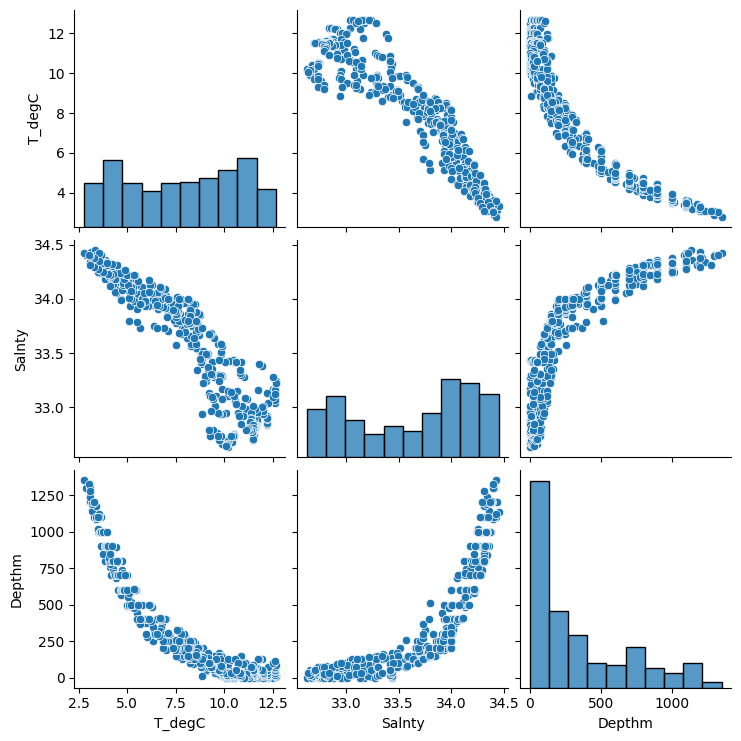

In [10]:
# Scatter plot between Salnty, T_degC and Depthm
sns.pairplot(data)


<Axes: xlabel='Salnty', ylabel='T_degC'>

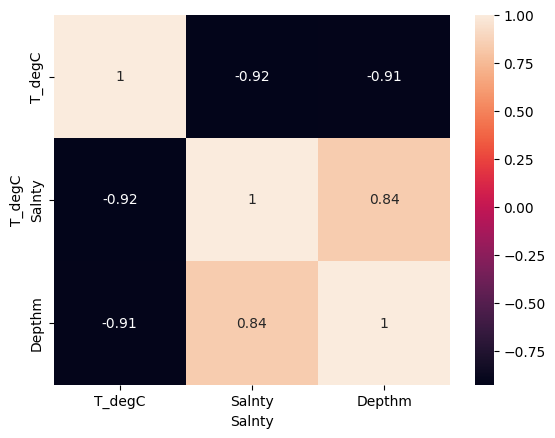

In [11]:
# Correlation matrix
data.corr()

# Heatmap
sns.heatmap(data.corr(), annot=True)

# Scatter plot between Salnty and T_degC
sns.scatterplot(x="Salnty", y="T_degC", data=data)

# Scatter plot between Salnty and Depthm
sns.scatterplot(x="Salnty", y="Depthm", data=data)

# Scatter plot between T_degC and Depthm
sns.scatterplot(x="T_degC", y="Depthm", data=data)

# Scatter plot between Salnty and T_degC
sns.scatterplot(x="Salnty", y="T_degC", data=data)

# Scatter plot between Salnty and Depthm
sns.scatterplot(x="Salnty", y="Depthm", data=data)

# Scatter plot between T_degC and Depthm
sns.scatterplot(x="T_degC", y="Depthm", data=data)




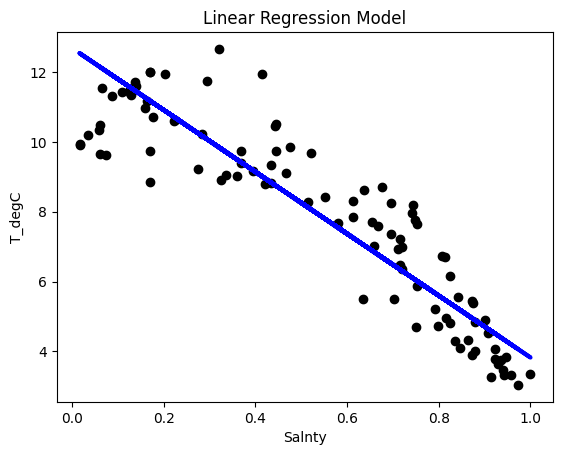

In [12]:
# ML model for regression problem
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Take X and y sa Temparature and Salinity
X = data[["Salnty"]]
y = data[["T_degC"]]

# Normalization with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create model
model = LinearRegression()

# Fit model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Check model score
model.score(X_test, y_test)

# Check model coefficients
model.coef_ # Salnty coefficient

# Check model intercept
model.intercept_   # Intercept value 

# Check model MSE
mean_squared_error(y_test, y_pred)

# Check model R2
r2_score(y_test, y_pred)

# Plot model 
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

# Title
plt.title('Linear Regression Model')

# X label
plt.xlabel('Salnty')

# Y label
plt.ylabel('T_degC')

# Show plot
plt.show()

In [13]:
# Print evaluation metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

# Print model coefficients
print('Model coefficients:', model.coef_)
print('Model intercept:', model.intercept_)

# Print model score
print('Model score:', model.score(X_test, y_test))

# Print model equation
print('Model equation: y =', model.coef_[0][0], '* x +', model.intercept_[0])


Mean Squared Error: 1.3433564798272046
Root Mean Squared Error: 1.159032562021967
R2 Score: 0.8198946633534588
Model coefficients: [[-8.85865008]]
Model intercept: [12.6829726]
Model score: 0.8198946633534588
Model equation: y = -8.858650081602876 * x + 12.682972595684419


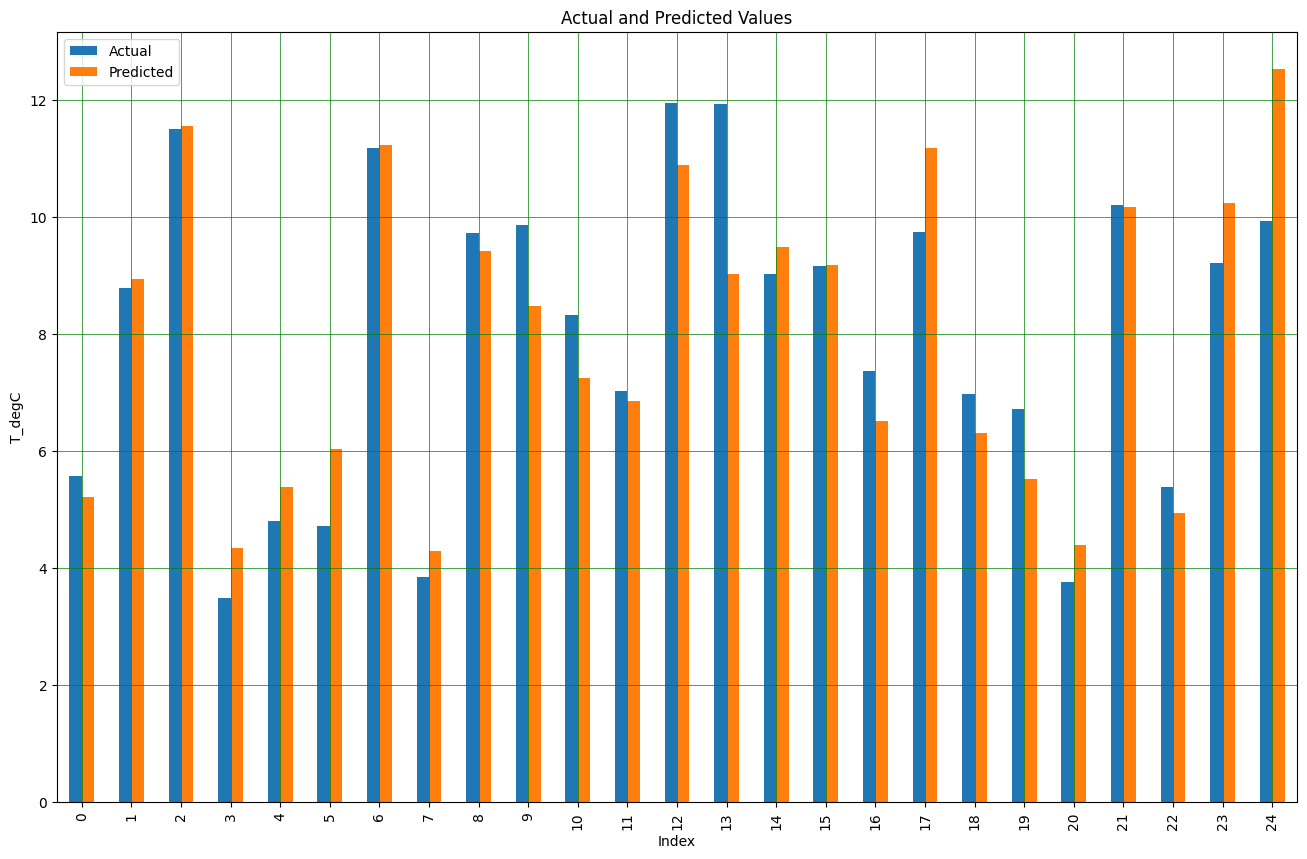

In [15]:
# Create a dataframe with actual and predicted values
df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
df

# Plot actual and predicted values
df1 = df.head(25)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# Title 
plt.title('Actual and Predicted Values')
# X label
plt.xlabel('Index')
# Y label
plt.ylabel('T_degC')
plt.show()